In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import copy

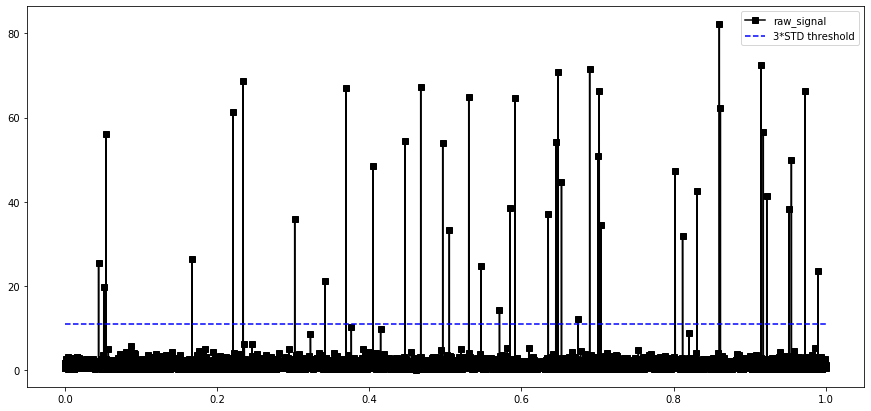

In [5]:
n_singal = 10000
time = np.arange(0, n_singal) / n_singal
raw_signal = np.exp(.5 * np.random.randn(n_singal))

# add some random outiers
n_outliers = 50
random_points = np.random.randint(0, n_singal, n_outliers)
raw_signal[random_points] = np.random.rand(n_outliers) * (np.max(raw_signal) - np.min(raw_signal)) * 10

# show the signal
plt.figure(figsize=(15, 7))
plt.plot(time, raw_signal, 'ks-', label='raw_signal')
# auto-threshold based on mean and standard deviation
threshold = np.mean(raw_signal) + 3 * np.std(raw_signal)
plt.plot([time[0], time[-1]], [threshold, threshold], 'b--', label='3*STD threshold')
plt.legend()
plt.show()


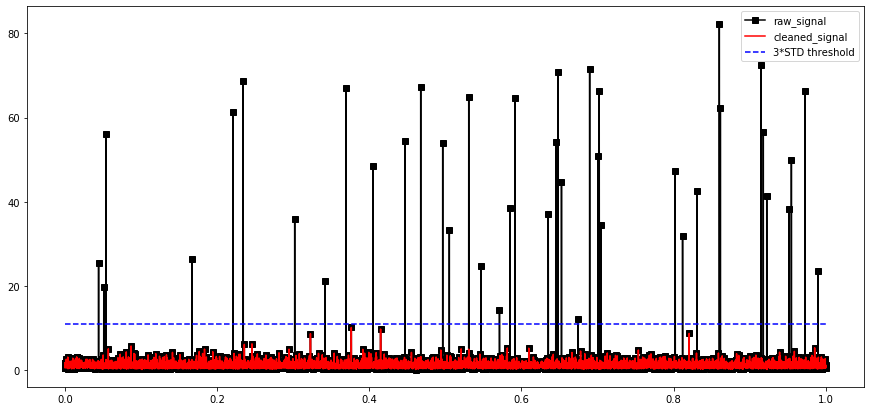

In [10]:
outliers = raw_signal > threshold

# and interpolate missing points
cleaned_signal = copy.deepcopy(raw_signal)
cleaned_signal[outliers] = interpolate.griddata(time[~outliers], raw_signal[~outliers], time[outliers], method='cubic')

plt.figure(figsize=(15, 7))
plt.plot(time, raw_signal, 'ks-', label='raw_signal')
plt.plot(time, cleaned_signal, 'r-', label='cleaned_signal')
# auto-threshold based on mean and standard deviation
threshold = np.mean(raw_signal) + 3 * np.std(raw_signal)
plt.plot([time[0], time[-1]], [threshold, threshold], 'b--', label='3*STD threshold')
plt.legend()
plt.show()
